In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.rcParams['pdf.fonttype'] = 42

In [66]:
data = pd.read_csv('quantification.csv')
data

Intensity  Length strain genotype
0       23.188  11.437   L972       WT
1       12.775  13.391   L972       WT
2       18.562  12.226   L972       WT
3       17.600  11.902   L972       WT
4       14.675  12.087   L972       WT
..         ...     ...    ...      ...
329     27.087  13.433  HS754   Padh11
330     36.650  12.299  HS754   Padh11
331     42.462  12.892  HS754   Padh11
332     37.038  12.888  HS754   Padh11
333     34.962  14.796  HS754   Padh11

[334 rows x 4 columns]

In [96]:
data.groupby('genotype').size()

genotype
Padh1     55
Padh11    56
Ptdh1     60
Ptdh11    46
Ptdh13    20
Ptdh15    57
WT        20
empty     20
dtype: int64

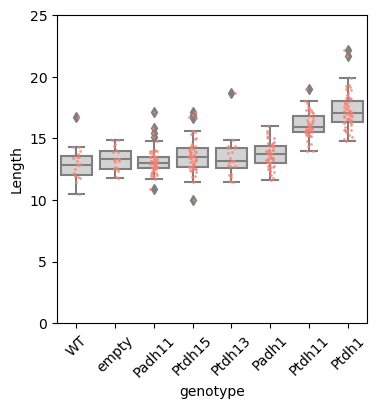

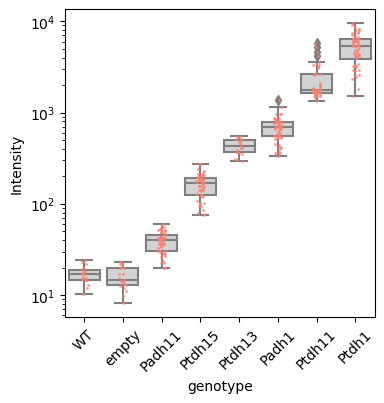

In [73]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='genotype',y='Length', color='lightgray',order=[
    'WT','empty','Padh11','Ptdh15','Ptdh13','Padh1','Ptdh11','Ptdh1'
])
sns.stripplot(data=data, x='genotype',y='Length',color='salmon',alpha=0.8,size=2,order=[
    'WT','empty','Padh11','Ptdh15','Ptdh13','Padh1','Ptdh11','Ptdh1'
])
plt.xticks(rotation=45)
plt.ylim(0,25)
plt.savefig('Length.pdf')
plt.savefig('Length.jpg', bbox_inches='tight',dpi=300)
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='genotype',y='Intensity', color='lightgray',order=[
    'WT','empty','Padh11','Ptdh15','Ptdh13','Padh1','Ptdh11','Ptdh1'
])
sns.stripplot(data=data, x='genotype',y='Intensity',color='salmon',alpha=0.8,size=2,order=[
    'WT','empty','Padh11','Ptdh15','Ptdh13','Padh1','Ptdh11','Ptdh1'
])
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig('Intensity.pdf')
plt.savefig('Intensity.jpg', bbox_inches='tight',dpi=300)
plt.show()

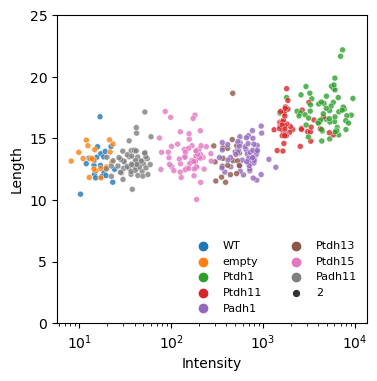

In [76]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=data,x='Intensity',y='Length',hue='genotype', size=2, alpha=0.8)
plt.xscale('log')
plt.legend(fontsize="8", frameon=False, ncol=2,loc='lower right')
plt.ylim(0,25)
plt.savefig('Intensity_vs_Length.pdf')
plt.savefig('Intensity_vs_length.jpg', bbox_inches='tight',dpi=300)
plt.show()

In [85]:
fvalue, pvalue = stats.f_oneway(data.loc[data['genotype']=='WT','Length'],
                                data.loc[data['genotype']=='empty','Length'],
                                data.loc[data['genotype']=='Padh11','Length'],
                                data.loc[data['genotype']=='Ptdh13','Length'],
                                data.loc[data['genotype']=='Padh1','Length'],
                                data.loc[data['genotype']=='Ptdh11','Length'],
                                data.loc[data['genotype']=='Ptdh1','Length'])
print(fvalue)
print(pvalue)

tukey = pairwise_tukeyhsd(data['Length'],data['genotype'])
tukey.summary()

91.744589482624
2.894152934065373e-62


<class 'statsmodels.iolib.table.SimpleTable'>